# Implmenting Maximum Likelihood and Bayes Estimators

George Ho 9/21/17

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Beta-Binomial (estimating binomial probability $p$)

### Making data

In [2]:
# Ground truth
p = 0.3
n = 10
data_size = 100

# Data
X = np.random.binomial(n, p, data_size)

# Number of samples used to plot histograms
hist_size = 10000

### Plotting priors

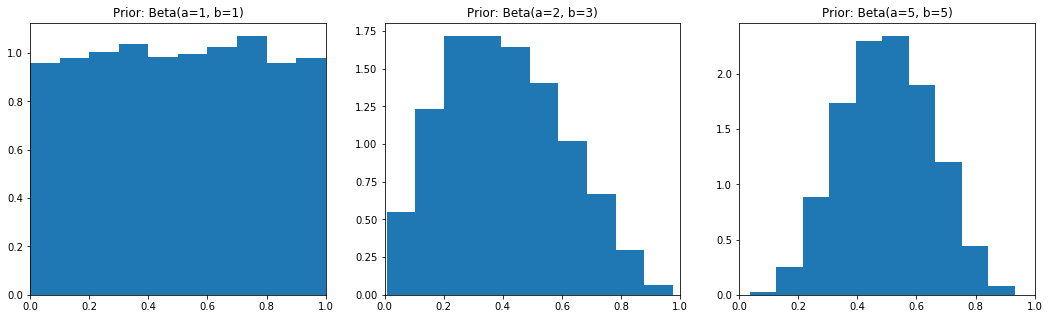

In [3]:
# 3 sets of hyperparameters
hyperparams = [(1, 1), (2, 3), (5, 5)]

fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
priors = np.empty(shape=[hist_size, len(hyperparams)])

for i, ((a, b), ax) in enumerate(zip(hyperparams, axarr)):
    priors[:, i] = np.random.beta(a=a, b=b, size=hist_size)
    ax.hist(priors[:, i], normed=1)
    ax.set_xlim(0, 1)
    ax.set_title("Prior: Beta(a={0}, b={1})".format(a, b))

plt.show()

### MAP and ML estimation

In [4]:
# MAP estimate
map_params = np.empty(shape=[len(X)+1, len(hyperparams)*len(hyperparams[0])])
map_params[0,:] = list(itertools.chain(*hyperparams))

for i, x in enumerate(X):
    # Update rule for binomial model with beta prior for p
    map_params[i+1, :] = map_params[i, :] + np.tile([x, n-x], 3)

# Expectation of Beta(a,b) = a/(a+b)
map_ests = (map_params[:, ::2] / (map_params[:, ::2] + map_params[:, 1::2]))

In [31]:
# ML estimate
ml_ests = np.empty(shape=[len(X), 1])

for i in range(len(X)):
    ml_ests[i] = np.mean(X[:i+1])/n

### Plotting mean squared error

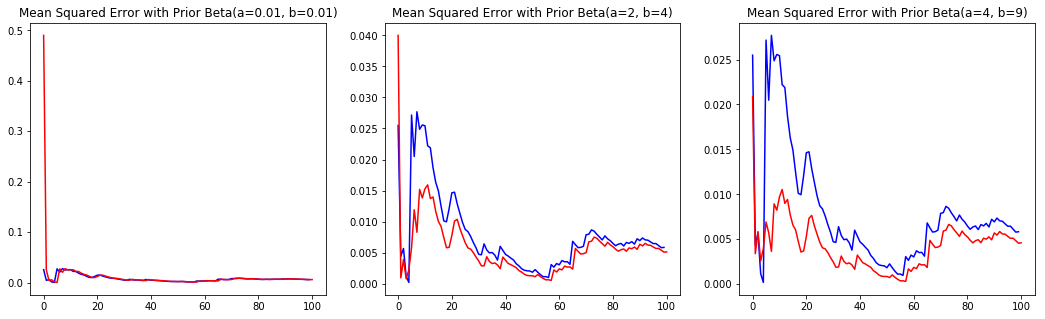

In [30]:
fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
ml_mean_sq_err = (ml_ests - p)**2
map_mean_sq_err = (map_ests - p)**2

for i, (ax, (a, b)) in enumerate(zip(axarr, hyperparams)):
    ax.plot(ml_mean_sq_err, 'b')
    ax.plot(map_mean_sq_err[:, i], 'r')
    ax.set_title("Mean Squared Error with Prior Beta(a={0}, b={1})".format(a, b))

plt.show()

### Plotting posteriors for various observations

We use the first set of hyperparameters in `hyperparams` (i.e. a $Beta(1, 1)$ prior) to illustrate this.

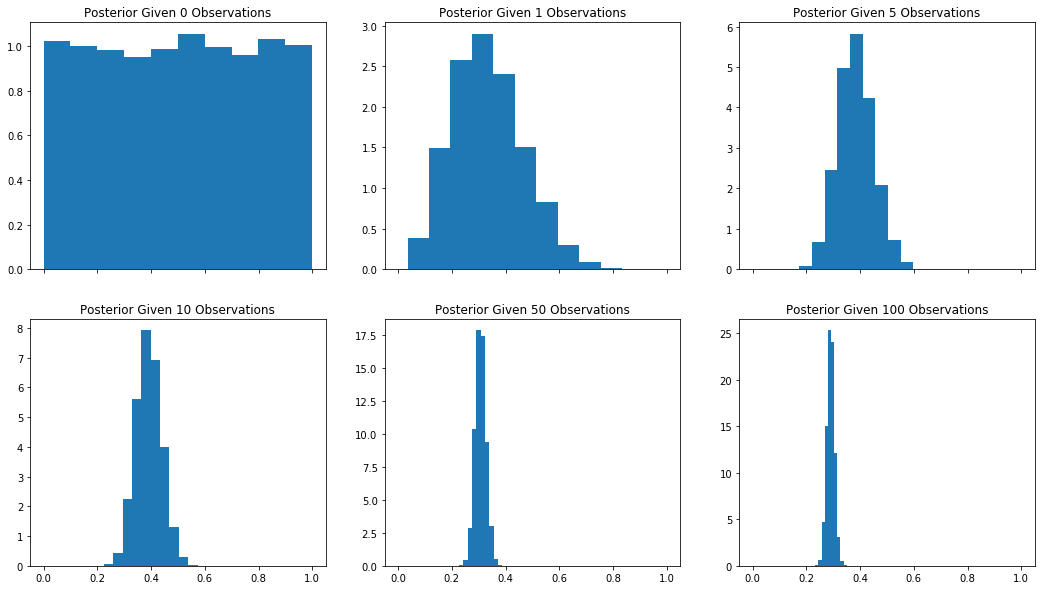

In [7]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=[18, 10], sharex=True)
num_obs = [0, 1, 5, 10, 50, 100]

for i, (num, ax) in enumerate(zip(num_obs, axarr.flatten())):
    samp = np.random.beta(a=map_params[num, 0], b=map_params[num, 1], size=hist_size)
    ax.hist(samp, normed=True)
    ax.set_title("Posterior Given {} Observations".format(num))
    
plt.show()

## Gaussian with Known Variance (estimating mean $μ$)

### Making data

In [14]:
# Ground truth
mu = -1
sigma = 4
data_size = 100

# Data
X = np.random.normal(loc=mu, scale=sigma, size=data_size)

# Number of samples used to plot histograms
hist_size = 10000

### Plotting priors

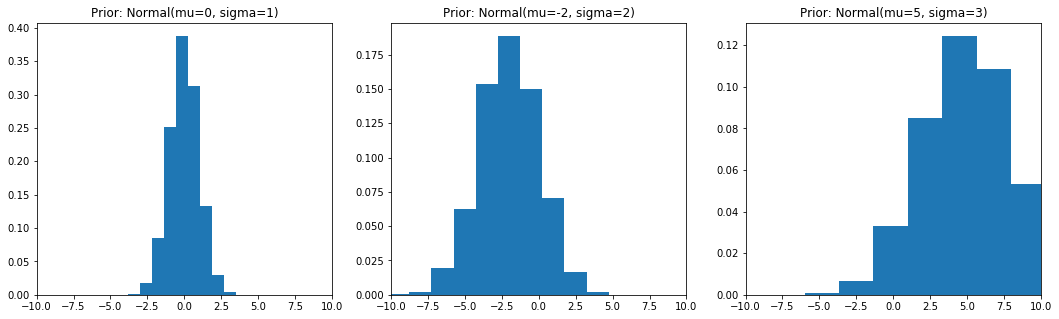

In [21]:
# 3 sets of hyperparameters
hyperparams = [(0, 1), (-2, 2), (5, 3)]

fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
priors = np.empty(shape=[hist_size, len(hyperparams)])

for i, ((mu_0, sigma_0), ax) in enumerate(zip(hyperparams, axarr)):
    priors[:, i] = np.random.normal(loc=mu_0, scale=sigma_0, size=hist_size)
    ax.hist(priors[:, i], normed=True)
    ax.set_xlim(-10, 10)
    ax.set_title("Prior: Normal(mu={0}, sigma={1})".format(mu_0, sigma_0))

plt.show()

### MAP and ML estimation

In [16]:
# MAP estimate
map_params = np.zeros(shape=[len(X)+1, len(hyperparams)*len(hyperparams[0])])
map_params[0,:] = list(itertools.chain(*hyperparams))

for i, x in enumerate(X):
    # Update rule for normal model with normal prior for mu. Online learning.
    coeff = sigma**2 / (map_params[i, 1::2]**2 + sigma**2)
    map_params[i+1, ::2] = coeff*map_params[i, ::2] + (1-coeff)*x
    map_params[i+1, 1::2] = np.sqrt(1/(1/(map_params[i, 1::2]**2) + 1/sigma**2))

# Expectation of N(mu, sigma^2) = mu
map_ests = map_params[:, ::2]

In [17]:
# ML estimate
ml_ests = np.empty(shape=[len(X), 1])

for i in range(len(X)):
    ml_ests[i] = np.mean(X[:i+1])

### Plotting mean squared error

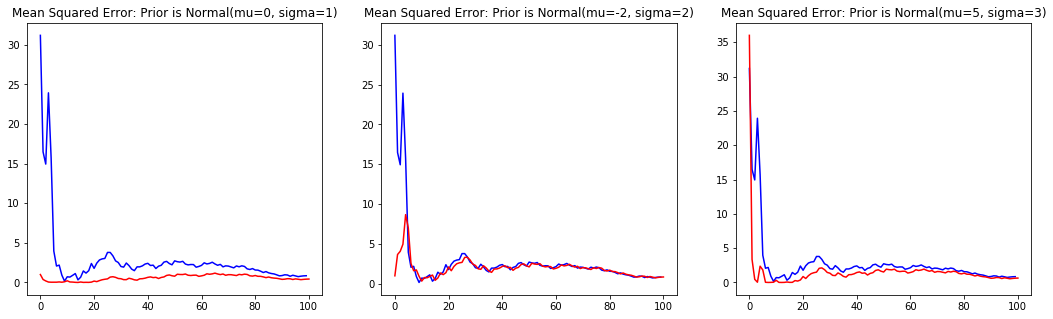

In [18]:
fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
ml_mean_sq_err = (ml_ests - mu)**2
map_mean_sq_err = (map_ests - mu)**2

for i, (ax, (mu_0, sigma_0)) in enumerate(zip(axarr, hyperparams)):
    ax.plot(ml_mean_sq_err, 'b')
    ax.plot(map_mean_sq_err[:, i], 'r')
    ax.set_title("Mean Squared Error: Prior is Normal(mu={0}, sigma={1})".format(mu_0, sigma_0))

plt.show()

### Plotting posteriors for various observations

We use the first set of hyperparameters in `hyperparams` (i.e. a $N(0, 1)$ prior) to illustrate this.

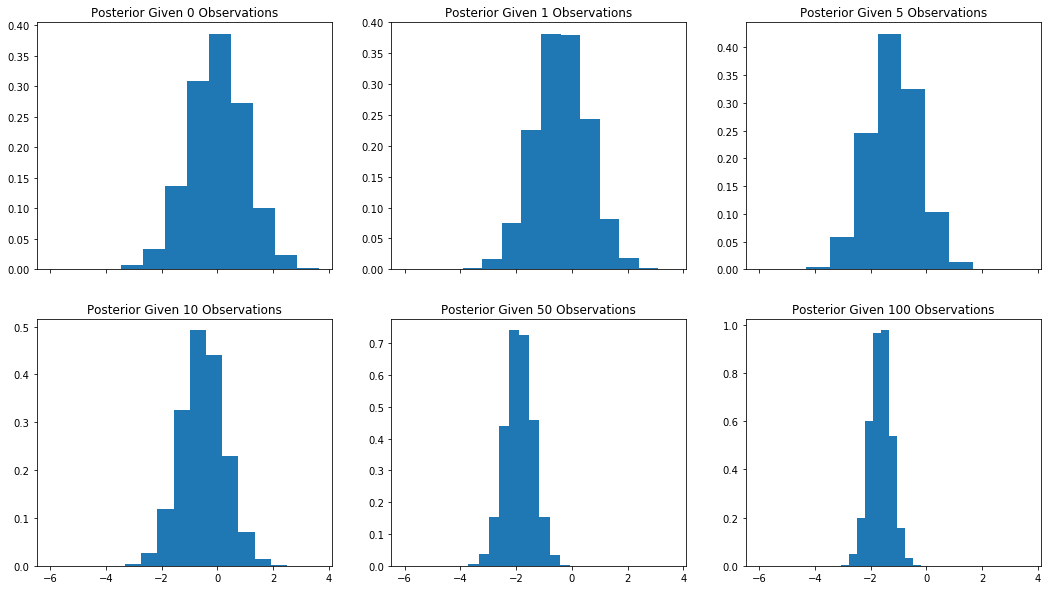

In [20]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=[18, 10], sharex=True)
num_obs = [0, 1, 5, 10, 50, 100]

for i, (num, ax) in enumerate(zip(num_obs, axarr.flatten())):
    samp = np.random.normal(loc=map_params[num, 0], scale=map_params[num, 1], size=hist_size)
    ax.hist(samp, normed=True)
    ax.set_title("Posterior Given {} Observations".format(num))
    
plt.show()

## Gaussian with Known Mean (estimating precision $τ$)

### Making data

In [22]:
# Ground truth
mu = 3
tau = 1/4
data_size = 100

# Data
X = np.random.normal(loc=mu, scale=np.sqrt(1/tau), size=data_size)

# Number of samples used to plot histograms
hist_size = 10000

### Plotting priors

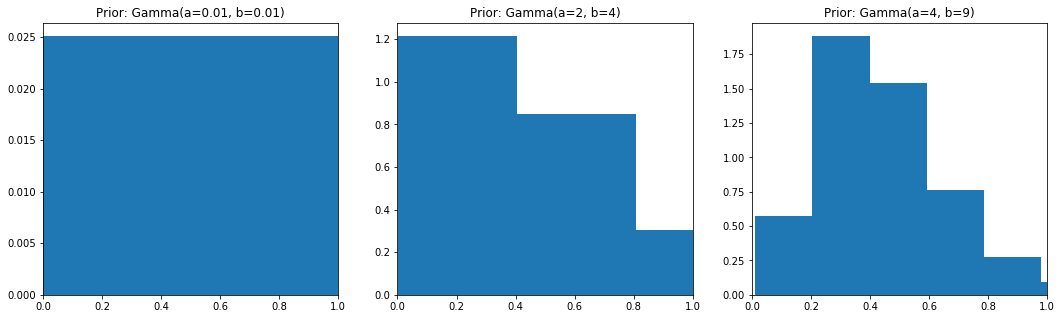

In [23]:
# 3 sets of hyperparameters
hyperparams = [(0.01, 0.01), (2, 4), (4, 9)]

fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
priors = np.empty(shape=[hist_size, len(hyperparams)])

for i, ((a, b), ax) in enumerate(zip(hyperparams, axarr)):
    # NumPy uses k and theta and not alpha and beta. The 1/ is to compensate for this
    priors[:, i] = np.random.gamma(shape=a, scale=1/b, size=hist_size)
    ax.hist(priors[:, i], normed=True)
    ax.set_xlim(0, 1)
    ax.set_title("Prior: Gamma(a={0}, b={1})".format(a, b))

plt.show()

### MAP and ML estimation

In [24]:
# MAP estimate
map_params = np.empty(shape=[len(X)+1, len(hyperparams)*len(hyperparams[0])])
map_params[0,:] = list(itertools.chain(*hyperparams))

for i, x in enumerate(X):
    # Update rule for Gaussian model with Gamma prior for tau. Online learning.
    map_params[i+1, ::2] = map_params[i, ::2] + 1/2
    map_params[i+1, 1::2] = map_params[i, 1::2] + 0.5*(x - mu)**2

# Expectation of Gamma(a,b) = a/b
map_ests = map_params[:, ::2] / map_params[:, 1::2]

In [25]:
# ML estimate
ml_ests = np.empty(shape=[len(X), 1])

for i, x in enumerate(X):
    ml_ests[i] = 1/(np.sum((X[:i+1] - mu)**2)/(i+1))

### Plotting mean squared error

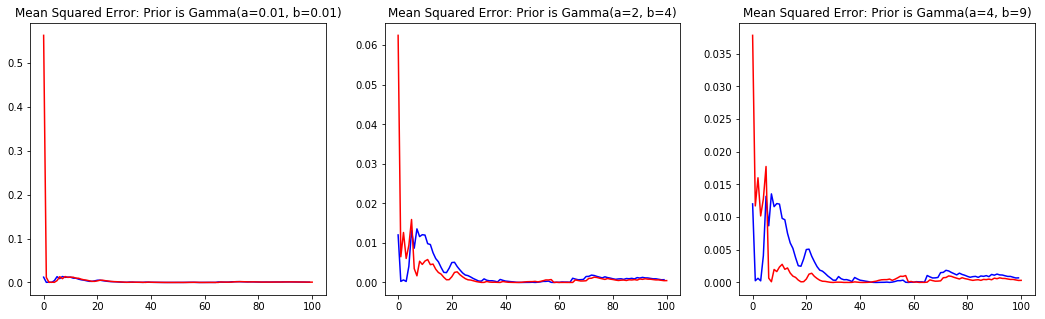

In [27]:
fig, axarr = plt.subplots(nrows=1, ncols=len(hyperparams), figsize=[18, 5])
ml_mean_sq_err = (ml_ests - tau)**2
map_mean_sq_err = (map_ests - tau)**2

for i, (ax, (a, b)) in enumerate(zip(axarr, hyperparams)):
    ax.plot(ml_mean_sq_err, 'b')
    ax.plot(map_mean_sq_err[:, i], 'r')
    ax.set_title("Mean Squared Error: Prior is Gamma(a={0}, b={1})".format(a, b))

plt.show()

### Plotting posteriors for various observations

We use the first set of hyperparameters in `hyperparams` (i.e. a $Gamma(0.01, 0.01)$ prior) to illustrate this.

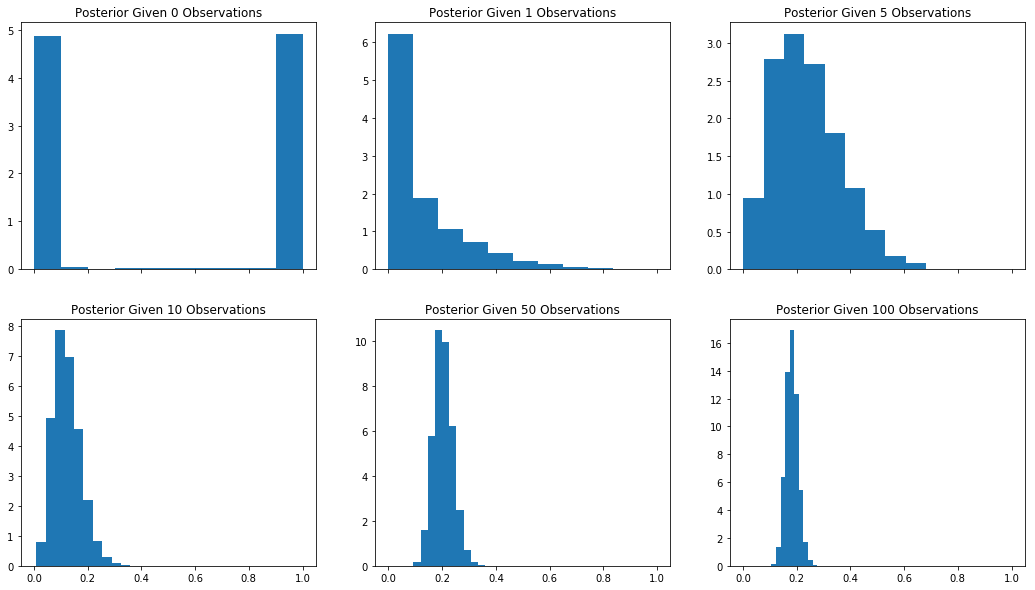

In [29]:
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=[18, 10], sharex=True)
num_obs = [0, 1, 5, 10, 50, 100]

for i, (num, ax) in enumerate(zip(num_obs, axarr.flatten())):
    foo = np.random.beta(a=map_params[num, 0], b=map_params[num, 1], size=hist_size)
    ax.hist(foo, normed=True)
    ax.set_title("Posterior Given {} Observations".format(num))
    
plt.show()